In [17]:
import pandas as pd
from sklearn.metrics import roc_curve

### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


In [18]:
train_df = pd.read_csv('loananaylsis.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
train_df = train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
############ Count number of Categorical and Numerical Columns ######################

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


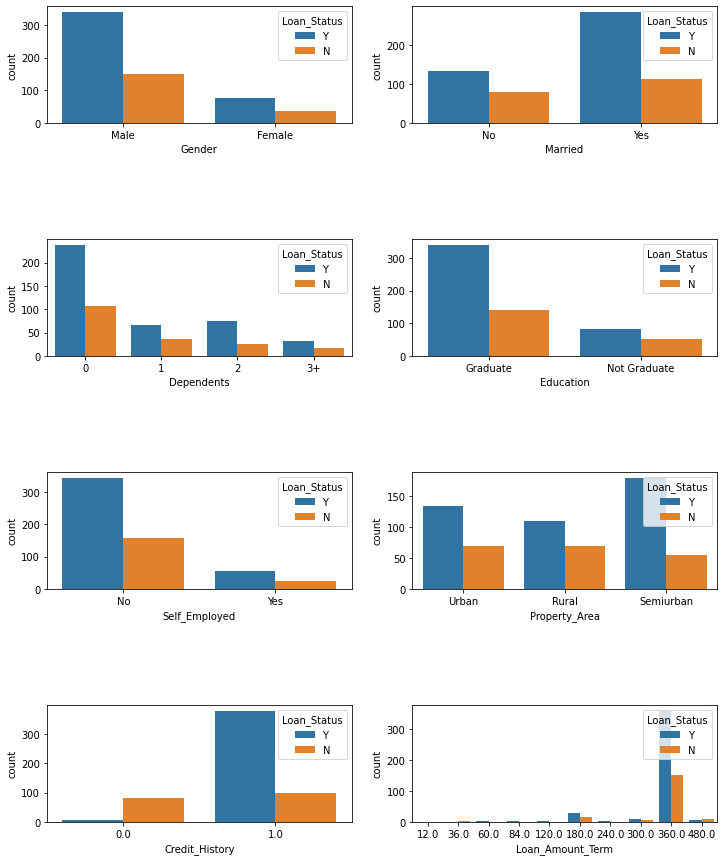

In [21]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

<h3>Plots above convey following things about the dataset:</h3>
Loan Approval Status: About 2/3rd of applicants have been granted loan.

* Sex: There are more Men than Women (approx. 3x)
* Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
* Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
* Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
* Employment: 5/6th of population is not self employed.
* Property Area: More applicants from Semi-urban and also likely to be granted loans.
* Applicant with credit history are far more likely to be accepted.
* Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


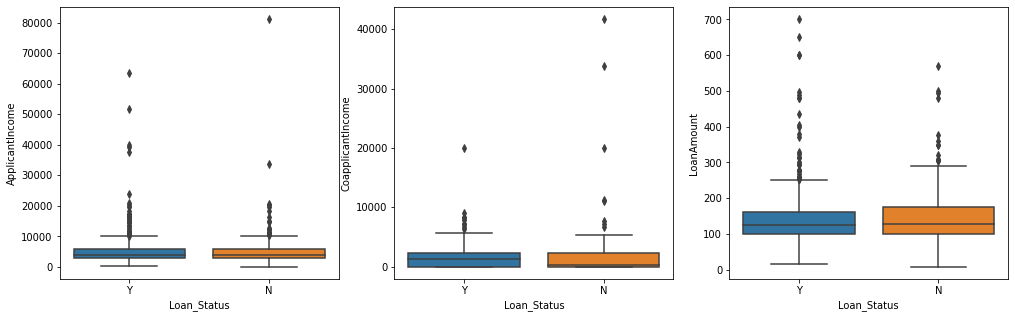

In [22]:
# Numerical Columns 
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

<h3>Preprocessing Data:</h3>
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

* Encoding Categorical Features.
* Imputing missing values

In [23]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [24]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


<h1> Random Forest Classifier</h1>

In [25]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.7022957291124279
Validation Mean Accuracy:  0.7983714698000413


<h3>Random Forest: Test Data Evaluation</h3>

In [26]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Text(33.0, 0.5, 'Real Values')

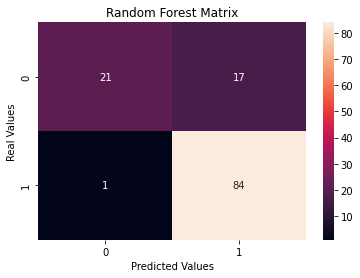

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)
plt.title("Random Forest Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Real Values")

<h2> Using Expert System  Evalation</h2>

In [28]:
Expert_df = X_test
Expert_df["Loan_status"]= y_test
Expert_df.to_csv("Expert.csv")


In [29]:
test_df = pd.read_csv("Expert_predicted.csv")

In [30]:

y_true = test_df["Loan_status"]
y_pred = test_df["Predicted_status"]
print("Test Accuracy: ",accuracy_score(y_true,y_pred))
print("Test F1 Score: ",f1_score(y_true,y_pred))



Test Accuracy:  0.8130081300813008
Test F1 Score:  0.8553459119496855


Text(33.0, 0.5, 'Real Values')

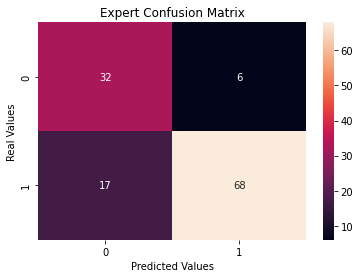

In [31]:
sns.heatmap(confusion_matrix(y_true,y_pred), annot = True)
plt.title("Expert Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Real Values")

In [32]:
from sklearn.metrics import classification_report
tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred,labels=[1,0])
print('Classification report of Expert System  : \n',matrix)

Outcome values : 
 68 17 6 32
Classification report of Expert System  : 
               precision    recall  f1-score   support

           1       0.92      0.80      0.86        85
           0       0.65      0.84      0.74        38

    accuracy                           0.81       123
   macro avg       0.79      0.82      0.80       123
weighted avg       0.84      0.81      0.82       123

